<a href="https://colab.research.google.com/github/irynadunets/Short-Course-2024-2025-CM3400---Introduction-to-Data-Science-with-Python---Semester-3/blob/main/Topic_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, seaborn, matplotlib.pyplot as plt
df = seaborn.load_dataset("iris")
## remove the species column, but keep a copy for later
species = df["species"]
## remove the species column
df = df.drop(columns = "species")
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
## load the function we need to to KMeans clustering
from sklearn.cluster import KMeans
## We have to select the number of clusters to form.
kmeans = KMeans(n_clusters = 3)
## fit the model
clusters = kmeans.fit(df)
## get the vector of cluster labels it has assigned
cluster_labels = clusters.predict(df)

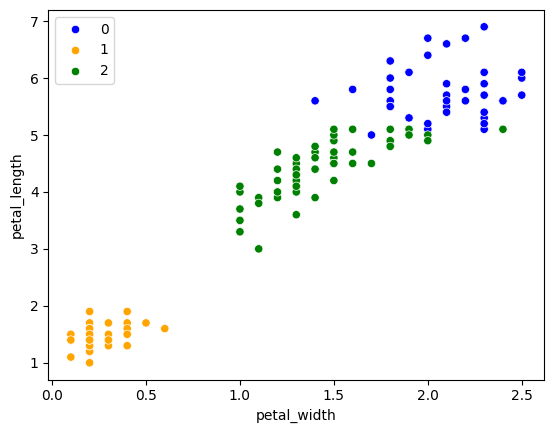

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
seaborn.scatterplot(x = 'petal_width', y = 'petal_length',
 data = df,
 hue = cluster_labels,
 palette = ['blue','orange','green'])
plt.show()

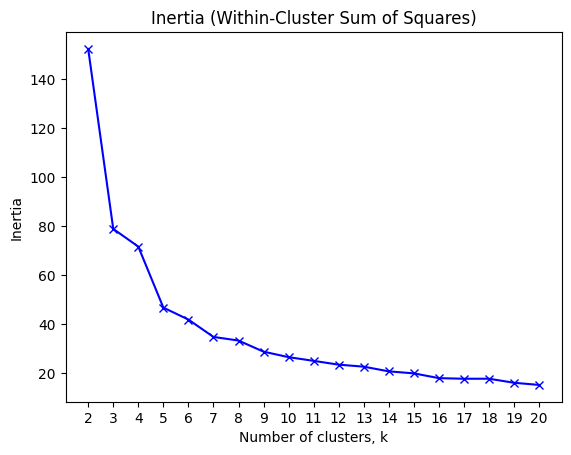

In [8]:
inertias = []
K = range(2, 21)
for k in K:
 clusterer = KMeans(n_clusters=k)
 clusters = clusterer.fit(df)
 cluster_labels = clusters.predict(df)
 inertias.append(clusterer.inertia_)
# note that a single tab indentation is required in Python
# to form a code block inside the for loop
## Then plot the elbow curve
plt.plot(K, inertias, 'bx-')
plt.xticks(K)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia (Within-Cluster Sum of Squares)')
plt.show()

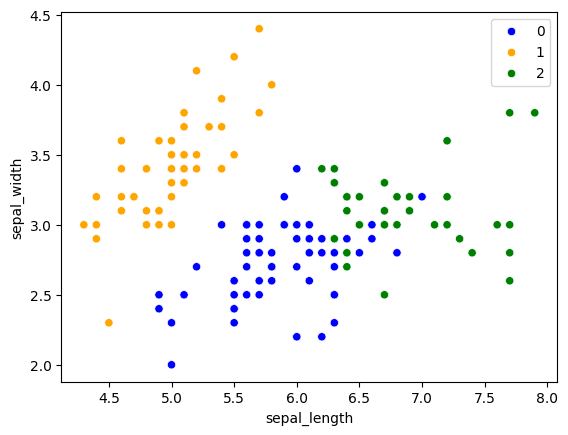

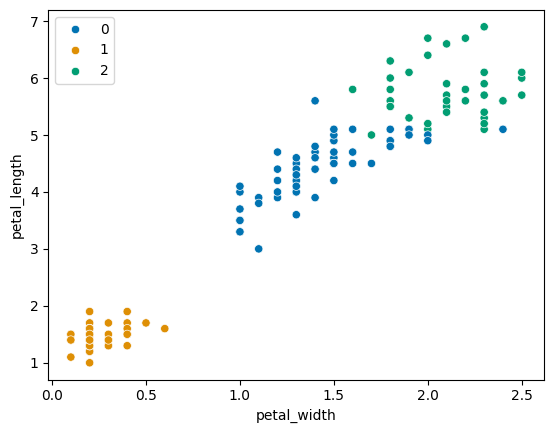

In [9]:
from sklearn.cluster import AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters = 3)
aggModel = aggcluster.fit(df)
cluster_labels = aggModel.labels_
seaborn.scatterplot(x = 'sepal_length', y = 'sepal_width',
 data = df, hue = cluster_labels,
 palette = ['blue','orange','green'])
plt.show()
seaborn.scatterplot(x = 'petal_width', y = 'petal_length',
 data = df, hue = cluster_labels,
 palette = 'colorblind')
plt.show()

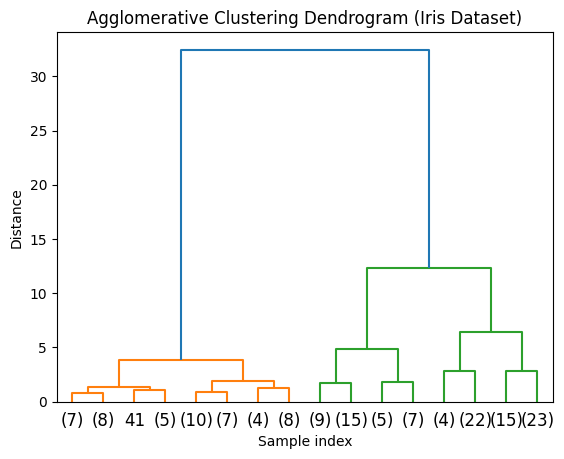

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Load iris data
iris = load_iris()
X = iris.data

# Define the model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function from scikit-learn docs to plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Count the number of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, model.distances_,
        counts
    ]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plot
plt.title("Agglomerative Clustering Dendrogram (Iris Dataset)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [14]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Load data
insur = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/insurance.csv")  # Update path if needed

# Select numeric features only
num_cols = ['age', 'bmi', 'children', 'cost']

# Scale with MinMaxScaler
scaler = preprocessing.MinMaxScaler()
insur_NORM = pd.DataFrame(scaler.fit_transform(insur[num_cols]), columns=num_cols)

Mounted at /content/drive


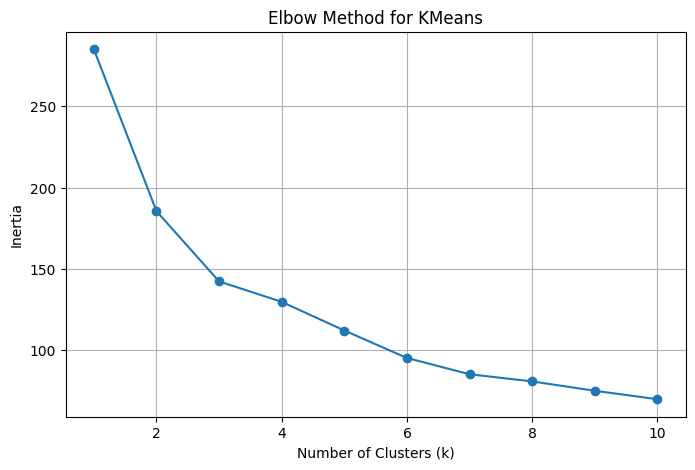

In [15]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(insur_NORM)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

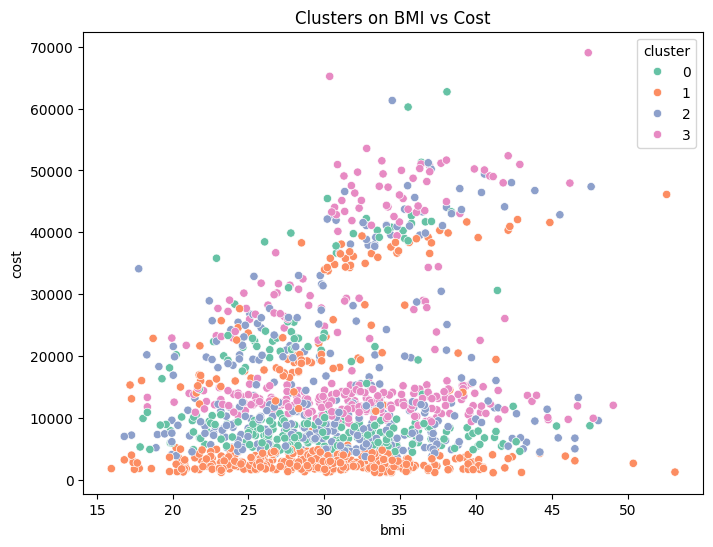

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
insur_NORM['cluster'] = kmeans.fit_predict(insur_NORM)

# Add cluster labels back to original df
insur['cluster'] = insur_NORM['cluster']

# Plot BMI vs. Cost with cluster coloring
plt.figure(figsize=(8,6))
sns.scatterplot(x='bmi', y='cost', hue='cluster', palette='Set2', data=insur)
plt.title("Clusters on BMI vs Cost")
plt.show()

In [17]:
print("\nCity vs Cluster")
print(pd.crosstab(insur['city'], insur['cluster'], normalize='index').round(2))


City vs Cluster
cluster       0     1     2     3
city                             
Aberdeen   0.21  0.27  0.29  0.23
Dundee     0.18  0.30  0.30  0.22
Edinburgh  0.20  0.31  0.25  0.24
Glasgow    0.19  0.33  0.25  0.23


In [18]:
print("\nGender vs Cluster")
print(pd.crosstab(insur['gender'], insur['cluster'], normalize='index').round(2))


Gender vs Cluster
cluster     0     1     2     3
gender                         
female   0.21  0.31  0.26  0.23
male     0.19  0.30  0.28  0.24


In [19]:
print("\nSmoker vs Cluster")
print(pd.crosstab(insur['smoker'], insur['cluster'], normalize='index').round(2))


Smoker vs Cluster
cluster     0     1     2     3
smoker                         
no       0.20  0.31  0.27  0.23
yes      0.19  0.27  0.29  0.26


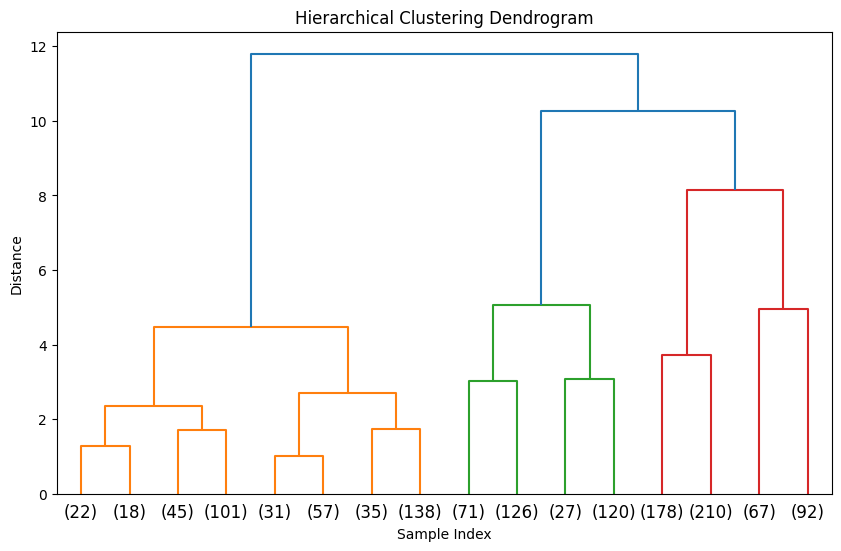

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Fit model
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(insur_NORM[num_cols])

# Custom function to plot dendrogram (from scikit-learn docs)
import numpy as np
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_, model.distances_, counts
    ]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

# Plot dendrogram
plt.figure(figsize=(10, 6))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Task	Result
Elbow Method	Likely optimal at k = 4
Cluster Plot	Groups show different patterns in BMI vs Cost
Crosstabs	Clusters may align with smoker status or city trends
Hierarchical Clustering	Gives structure of nested clusters via dendrogram

